In [1]:
# Let's prepare the data for testing and validation in models

from constants import target_name, x_path, y_path, preprocessed_data
from libs.simple_processing import separate_target, normalize
import pandas as pd

# data = pd.read_csv(preprocessed_data, usecols=[3], engine='python')
data = pd.read_csv(preprocessed_data, engine='python')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   month_number   1609124 non-null  int64
 1   shop_id        1609124 non-null  int64
 2   item_id        1609124 non-null  int64
 3   monthly_sales  1609124 non-null  int64
dtypes: int64(4)
memory usage: 49.1 MB


    month_number  monthly_sales
0              0         131479
1              1         128090
2              2         147142
3              3         107190
4              4         106970
5              5         125381
6              6         116966
7              7         125291
8              8         133332
9              9         127541
10            10         130009
11            11         183342
12            12         116899
13            13         109687
14            14         115297
15            15          96556
16            16          97790
17            17          97429
18            18          91280
19            19         102721
20            20          99208
21            21         107422
22            22         117845
23            23         168755
24            24         110971
25            25          84198
26            26          82014
27            27          77827
28            28          72295
29            29          64114
30      

KeyError: 1

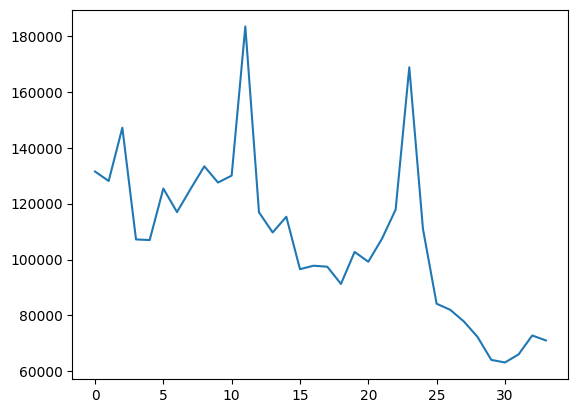

In [5]:

# Looks like the shop id is much better option - it is used almost 100K times
# Let's validate by drawing a global sales history for that shop and item

from pandas import DataFrame
import matplotlib.pyplot as plt

sales = data.groupby(['month_number'], as_index=False)['monthly_sales'].sum()

print(sales)

fig, ax = plt.subplots()
ax.plot(sales.month_number, sales.monthly_sales)

In [16]:
import numpy as np

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    # print(dataset)
    dataX, dataY = [], []
    for curri in range(len(dataset)-look_back-1):
        nexti = curri + look_back
        # print(nexti)
        dataX.append(dataset[curri: nexti])
        dataY.append(dataset[nexti: nexti + 1])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 4
X, y = create_dataset(sales.monthly_sales, look_back)

print('X: ', X, 'y: ', y)
# print(pd.DataFrame([X, y]))

# reshape input to be: [samples, time steps, features]

print(X.shape)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)
print(X)

print(y.shape)
y = np.reshape(y, (y.shape[0], 1, y.shape[1]))
print(y.shape)

X:  [[131479 128090 147142 107190]
 [128090 147142 107190 106970]
 [147142 107190 106970 125381]
 [107190 106970 125381 116966]
 [106970 125381 116966 125291]
 [125381 116966 125291 133332]
 [116966 125291 133332 127541]
 [125291 133332 127541 130009]
 [133332 127541 130009 183342]
 [127541 130009 183342 116899]
 [130009 183342 116899 109687]
 [183342 116899 109687 115297]
 [116899 109687 115297  96556]
 [109687 115297  96556  97790]
 [115297  96556  97790  97429]
 [ 96556  97790  97429  91280]
 [ 97790  97429  91280 102721]
 [ 97429  91280 102721  99208]
 [ 91280 102721  99208 107422]
 [102721  99208 107422 117845]
 [ 99208 107422 117845 168755]
 [107422 117845 168755 110971]
 [117845 168755 110971  84198]
 [168755 110971  84198  82014]
 [110971  84198  82014  77827]
 [ 84198  82014  77827  72295]
 [ 82014  77827  72295  64114]
 [ 77827  72295  64114  63187]
 [ 72295  64114  63187  66079]] y:  [[106970]
 [125381]
 [116966]
 [125291]
 [133332]
 [127541]
 [130009]
 [183342]
 [116899]
 [

Epoch 1/1000


2023-01-09 17:03:56.701540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-09 17:03:56.816687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-09 17:03:57.018028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 9ms/step - loss: 105629.2500 - mean_absolute_error: 105629.2500
Epoch 2/1000
29/29 [==============================] - 0s 8ms/step - loss: 105628.9453 - mean_absolute_error: 105628.9453
Epoch 3/1000
29/29 [==============================] - 0s 8ms/step - loss: 105628.5547 - mean_absolute_error: 105628.5547
Epoch 4/1000
29/29 [==============================] - 0s 8ms/step - loss: 105628.2656 - mean_absolute_error: 105628.2656
Epoch 5/1000
29/29 [==============================] - 0s 8ms/step - loss: 105628.0703 - mean_absolute_error: 105628.0703
Epoch 6/1000
29/29 [==============================] - 0s 8ms/step - loss: 105627.9453 - mean_absolute_error: 105627.9453
Epoch 7/1000
29/29 [==============================] - 0s 8ms/step - loss: 105627.7891 - mean_absolute_error: 105627.7891
Epoch 8/1000
29/29 [==============================] - 0s 8ms/step - loss: 105627.6953 - mean_absolute_error: 105627.6953
Epoch 9/1000
29/29 [=========================

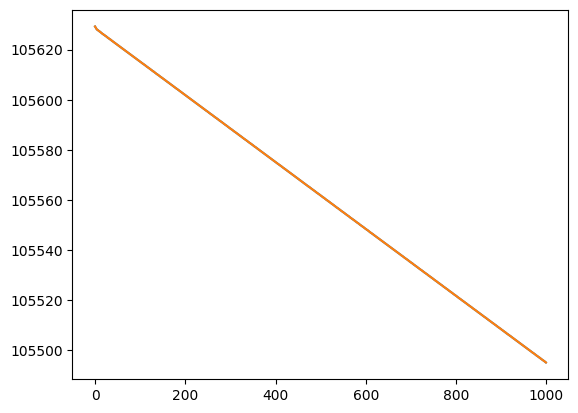

In [29]:
import tensorflow as tf
from libs.simple_plotter import plot_history

X_train = X.copy()
y_train = y.copy()

# features_count = X_train.shape[0]

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.005,    # minimium amount of change to count as an improvement
    patience=7,         # how many epochs to wait before stopping
    restore_best_weights=True
)

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(14, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam()
              , loss=tf.keras.losses.MeanAbsoluteError()
              , metrics=tf.metrics.MeanAbsoluteError())

history = model.fit(X_train, y_train
                    , epochs=1000
                    , callbacks=[early_stopping]
                    , batch_size = 1
                    , use_multiprocessing=True)

# print(history.history)
plot_history(history)


In [33]:
# last_month = [[66079]]
history =  [[[72295, 64114, 63187, 66079]]]
pred = model.predict(history) # sales from last month
print(type(pred))
print(pred)


1/1 [==============================] - 0s 43ms/step
<class 'numpy.ndarray'>
[[137.27483]]


2023-01-09 17:08:11.286852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-09 17:08:11.392416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 540ms/step


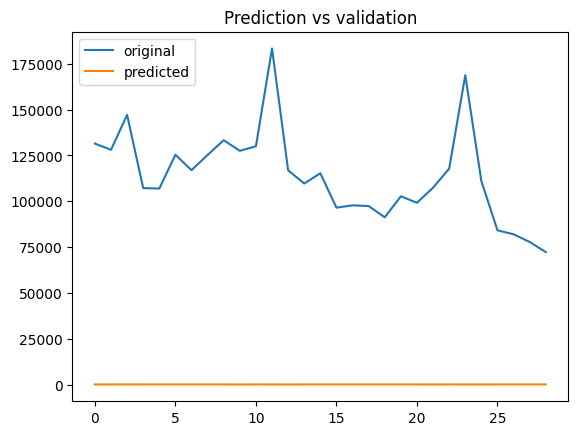

<Figure size 4000x1500 with 0 Axes>

In [30]:
from libs.simple_plotter import plot_predictions

y_pred = model.predict(X_train)

scale = range(len(y_pred))
plt.plot(scale, sales.monthly_sales[:len(y_pred)], label="original")
plt.plot(scale, y_pred, label="predicted")
plt.title("Prediction vs validation")
plt.legend()
fig = plt.figure(figsize=(40, 15))

# @TODO
# pętla robiąca predykcję na kilka m-cy w przód
# lookback > 1
# wykres obrazujacy przewidywanie przyszłości
# dane sprxedaźowe tygodniowe zamiast mcznych